Importing necessary libraries like pandas, matplotlib..etc

In [ ]:
# Importing necessary libraries like pandas, matplotlib, and numpy.
from IPython import get_ipython
from IPython.display import display
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
import pickle
from sklearn.tree import plot_tree

 **Section 2: Python Implementation – Building the Model Task 1: Data Preparation and Exploration**

In [ ]:
# Loading the dataset into a pandas DataFrame from a CSV file.
df = pd.read_csv('/content/sample_data/customer_churn.csv')

# Displaying the first 10 rows of the DataFrame to inspect the data structure.
df.head(10)

,CustomerID,Age,Subscription_Length_Months,Watch_Time_Hours,Number_of_Logins,Preferred_Content_Type,Membership_Type,Payment_Method,Payment_Issues,Number_of_Complaints,Resolution_Time_Days,Churn
0,1,56,35,62.579266,73,TV Shows,Basic,PayPal,0,7,8,0
1,2,69,15,159.714415,1,Sports,Basic,Credit Card,0,7,21,0
2,3,46,25,41.119547,36,Movies,Premium,PayPal,0,5,13,1
3,4,32,28,183.961735,35,Movies,Standard,Credit Card,0,0,27,0
4,5,60,10,87.782848,66,Movies,Standard,Bank Transfer,0,7,18,0
5,6,25,17,21.972598,63,Sports,Standard,Credit Card,1,7,5,0
6,7,38,22,164.070985,23,TV Shows,Standard,PayPal,0,1,6,0
7,8,56,26,77.834388,9,Documentaries,Basic,Credit Card,0,3,17,0
8,9,36,25,107.667343,34,Documentaries,Basic,Bank Transfer,1,1,11,0
9,10,40,17,26.899347,46,Movies,Premium,PayPal,0,3,20,0


Perform exploratory data analysis (EDA)



*   Display summary statistics.



In [ ]:
# Generating descriptive statistics of the DataFrame.
summary = df.describe().round(2)
# Save the summary DataFrame as a CSV file
summary.to_csv('summary_statistics.csv', index=True)
# Print summary in table format with borders
table = tabulate(summary, headers='keys', tablefmt='grid')
print(table)

+-------+--------------+---------+------------------------------+--------------------+--------------------+------------------+------------------------+------------------------+---------+
|       |   CustomerID |     Age |   Subscription_Length_Months |   Watch_Time_Hours |   Number_of_Logins |   Payment_Issues |   Number_of_Complaints |   Resolution_Time_Days |   Churn |
+=======+==============+=========+==============================+====================+====================+==================+========================+========================+=========+
| count |      1000    | 1000    |                      1000    |            1000    |            1000    |          1000    |                1000    |                1000    | 1000    |
+-------+--------------+---------+------------------------------+--------------------+--------------------+------------------+------------------------+------------------------+---------+
| mean  |       500.5  |   43.82 |                        18.22 |

*   Identify missing values and handle them appropriately.




In [ ]:
# Dropping 'CustomerID' columns for visualization.
df = df.drop(columns=["CustomerID"])
df.fillna(df.median(numeric_only=True), inplace=True)

# Verify if there are any missing values
missing_values = df.isnull().sum()
print(missing_values) # No NAN or empty values are found

Age                           0
Subscription_Length_Months    0
Watch_Time_Hours              0
Number_of_Logins              0
Preferred_Content_Type        0
Membership_Type               0
Payment_Method                0
Payment_Issues                0
Number_of_Complaints          0
Resolution_Time_Days          0
Churn                         0
dtype: int64




*  Visualize data distributions using histograms and box plots.



Displaying the histograms.


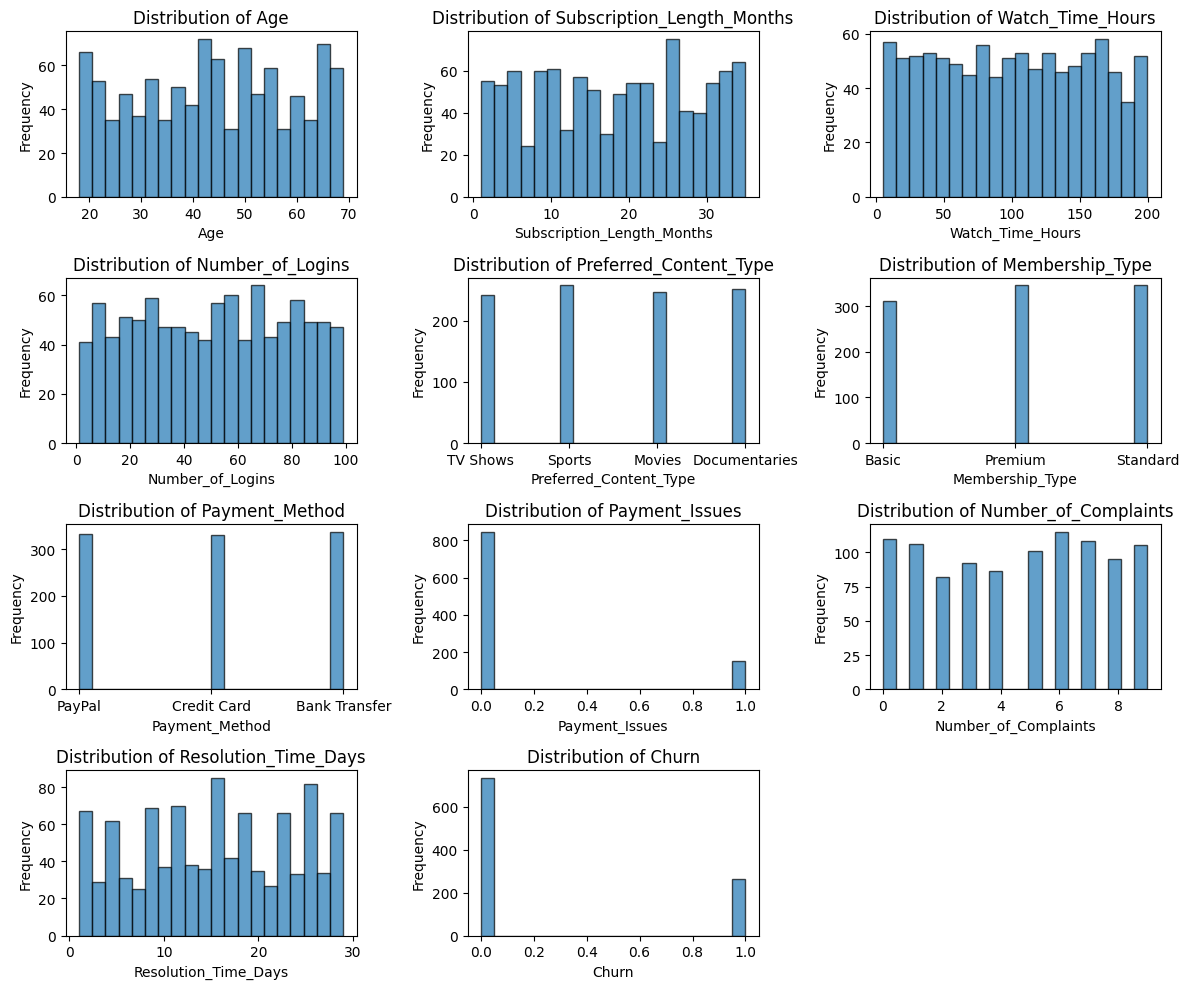

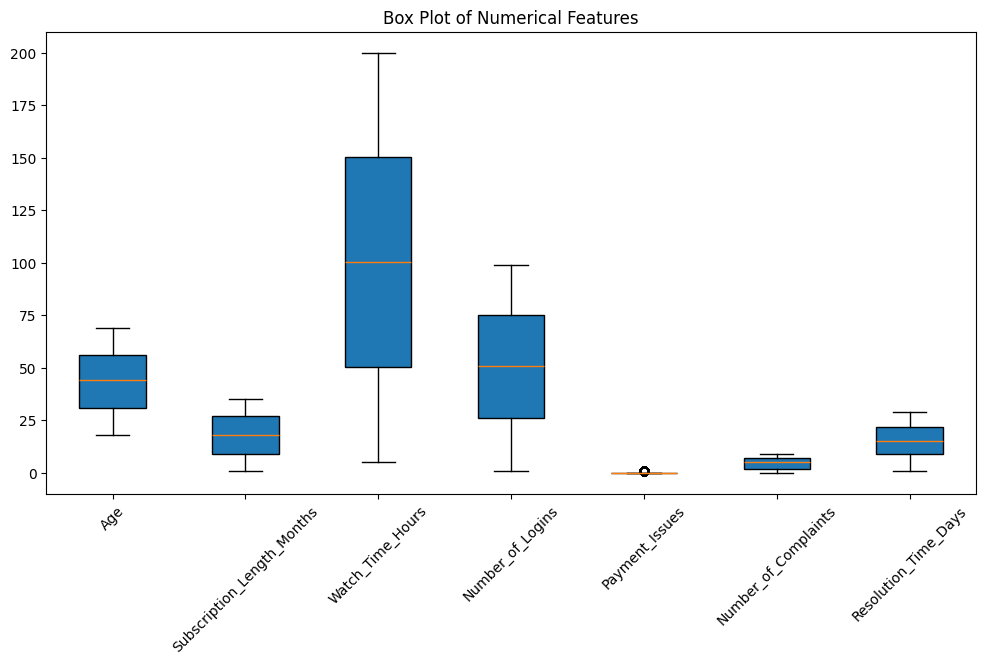

In [ ]:
# Creating a figure and axes for subplots.
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))
# Flattening the axes array for easy iteration.
axes = axes.flatten()
print(f"Displaying the histograms.")
# Iterating through columns to create histograms. Plotting the histogram. Setting the title of the subplot.
#Setting the x-axis label. Setting the y-axis label.
for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=20, edgecolor="black", alpha=0.7)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
# Turn off the extra axes
num_cols = len(df.columns)
for i in range(num_cols, len(axes)):
    axes[i].axis('off')
# Adjusting layout to prevent overlapping elements.
plt.tight_layout()
plt.show()

# Selecting only numeric columns from the DataFrame.
numeric_df = df.select_dtypes(include=[np.number])

# Creating a figure for box plots.
plt.figure(figsize=(12, 6))
# Generating box plots for numerical features.
plt.boxplot([numeric_df[col] for col in numeric_df.columns if col not in ["CustomerID", "Churn"]],
            tick_labels=[col for col in numeric_df.columns if col not in ["CustomerID", "Churn"]],
            vert=True, patch_artist=True)
# Rotating x-axis labels for better readability.
plt.xticks(rotation=45)
# Setting the title of the box plot.
plt.title("Box Plot of Numerical Features")
# Displaying the box plots.
plt.show()




*   Check for correlations between variables.



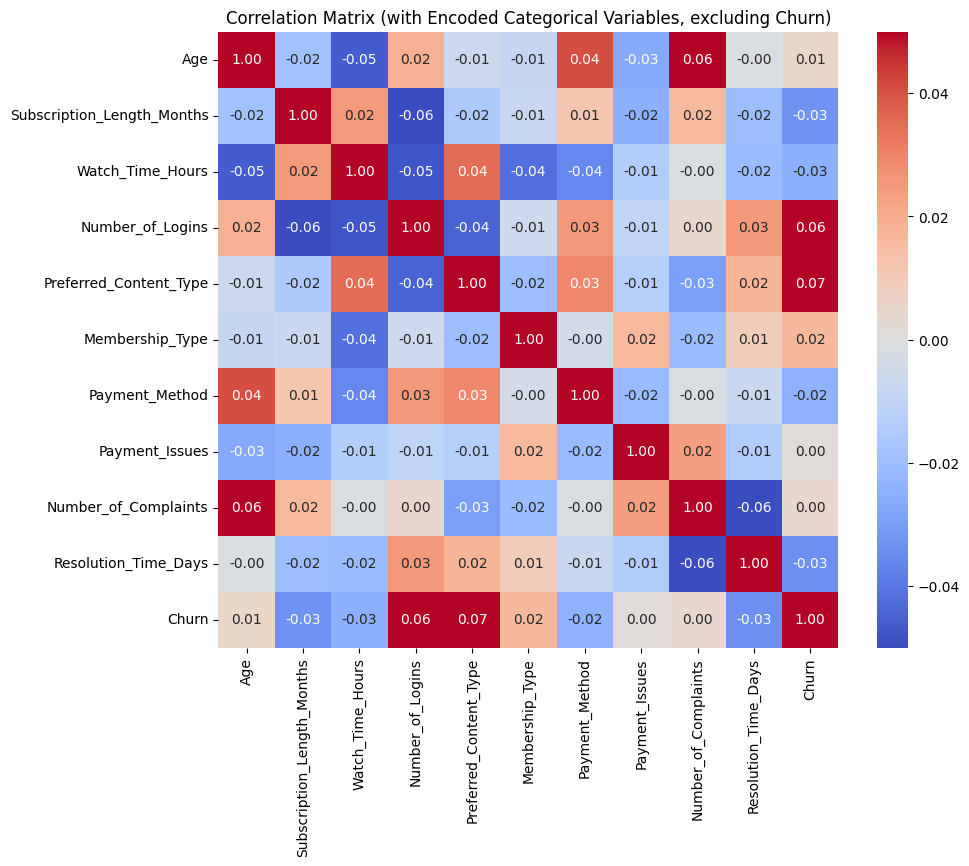

In [ ]:
label_encoder = LabelEncoder()

# Appling label encoding to non-numeric columns
df['Preferred_Content_Type'] = label_encoder.fit_transform(df['Preferred_Content_Type'])
df['Membership_Type'] = label_encoder.fit_transform(df['Membership_Type'])
df['Payment_Method'] = label_encoder.fit_transform(df['Payment_Method'])

# Calculating the correlation matrix for all columns
correlation_matrix = df.corr()

# Creating a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-.05, vmax=.05, fmt=".2f")
plt.title('Correlation Matrix (with Encoded Categorical Variables, excluding Churn)')
plt.show()


**Task 2:Building a Decision Tree Classifier**

- Prepare data

In [ ]:
# Import dataset
df_t2 = pd.read_csv('/content/sample_data/customer_churn.csv')

# Drop the customer id column
df_t2 = df_t2.drop(columns=["CustomerID"])

# Convert non-numerical data to numerical data
# OrdinalEncoder is used to handle ordinal data (Membership_Type).
# OneHotEncoder is used to handle nominal categories which do not have any particular order (Preferred_Content_Type and Payment_Method)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(df_t2[['Preferred_Content_Type']])
df_t2 = pd.concat([df_t2, ohetransform], axis=1).drop(columns = ['Preferred_Content_Type'])
ohetransform = ohe.fit_transform(df_t2[['Payment_Method']])
df_t2 = pd.concat([df_t2, ohetransform], axis=1).drop(columns = ['Payment_Method'])

Membership_Type = ['Basic', 'Standard', 'Premium']
enc = OrdinalEncoder(categories = [Membership_Type])
df_t2['Mermbership_Type'] = enc.fit_transform(df_t2[['Membership_Type']])
df_t2 = df_t2.drop(columns=['Membership_Type'])

# Split the data into features (x) and target (y)
X = df_t2.drop(columns=["Churn"])
Y = df_t2["Churn"]

- Split into dataset into training and testing sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

- Train a Decision Tree Classfier using scikit-learn

In [ ]:
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=35, min_samples_split=20, min_samples_leaf=5)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=35, min_samples_leaf=5,
                       min_samples_split=20)

- Use GridSearchCV to optimize hyperparameters (e.g. max depth, min samples split)

In [ ]:
# Define grid search hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 20]
}

# Use grid search to get best hyperparameters
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, Y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# Use the best estimator to get best decision tree
best_decision_tree = grid_search.best_estimator_
best_decision_tree.fit(X_train, Y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 2}
Best score found:  0.7025


DecisionTreeClassifier(max_depth=10, min_samples_leaf=20)

- Visualize the decision tree

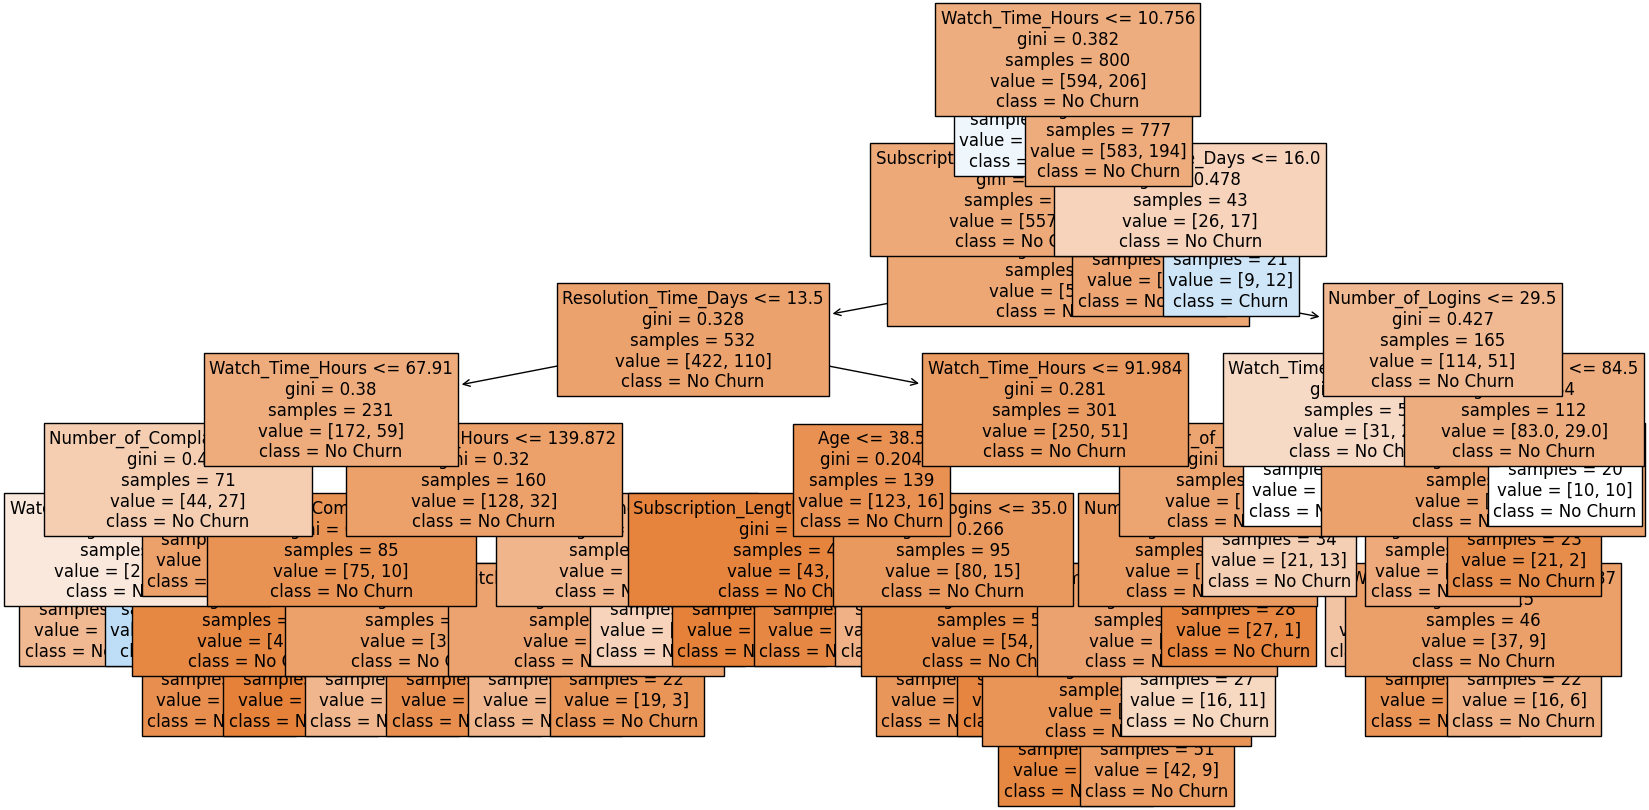

In [ ]:
# Plottig decission tree
plt.figure(figsize=(20, 10))
plot_tree(best_decision_tree, filled=True, feature_names=X.columns, class_names=["No Churn", "Churn"], fontsize=12)
plt.show()

- Evaluate model performance using

  Accuracy

  Precision

  Recall

  F1 Score

  Confusion Matrix


Accuracy:  0.655
Precision:  0.32142857142857145
Recall:  0.15254237288135594
F1 Score:  0.20689655172413793


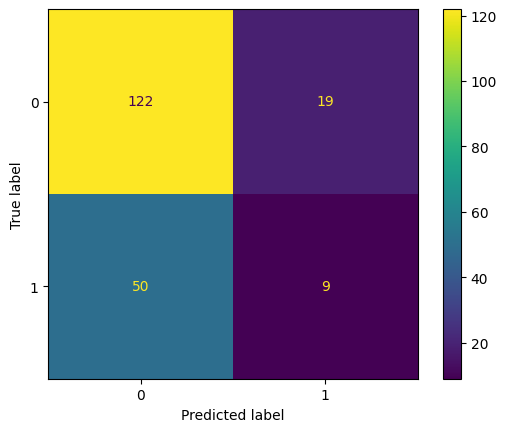

In [ ]:
# Get accuracy, precision, recall, and f1 score
Y_pred = best_decision_tree.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

# Show the result
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_decision_tree.classes_)
confusion_matrix_display.plot()
plt.show()

* Feature importance for Decision Tree Classifier

In [ ]:
# Printing Feature Importanc from decission tree
dt_feature_importance = best_decision_tree.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': dt_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                                 Feature  Importance
2                       Watch_Time_Hours    0.336868
3                       Number_of_Logins    0.265837
6                   Resolution_Time_Days    0.117371
1             Subscription_Length_Months    0.078303
0                                    Age    0.077433
5                   Number_of_Complaints    0.069599
10       Preferred_Content_Type_TV Shows    0.054589
4                         Payment_Issues    0.000000
7   Preferred_Content_Type_Documentaries    0.000000
8          Preferred_Content_Type_Movies    0.000000
9          Preferred_Content_Type_Sports    0.000000
11          Payment_Method_Bank Transfer    0.000000
12            Payment_Method_Credit Card    0.000000
13                 Payment_Method_PayPal    0.000000
14                      Mermbership_Type    0.000000


**Task 3: Improving Performance with Random Forests**



*   Training random forest model



In [ ]:
# Loading dataset
df = pd.read_csv('/content/sample_data/customer_churn.csv').drop(columns=["CustomerID"])

# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Defining features and target
X = df.drop(columns=['Churn'])  # Assuming 'Churn' is the target column
y = df['Churn']

# Handling class imbalance using oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Splitting the data int 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Trained model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)


Evaluate model performance using:


*   Accuracy
*   Precision
*   Recall
*   F1 Score
*   Confusion Matrix


In [ ]:

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)



Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       147
           1       0.74      0.73      0.74       147

    accuracy                           0.74       294
   macro avg       0.74      0.74      0.74       294
weighted avg       0.74      0.74      0.74       294





*   Analyze feature importance



                      Feature  Importance
2            Watch_Time_Hours    0.175326
3            Number_of_Logins    0.147691
9        Resolution_Time_Days    0.133006
0                         Age    0.132914
1  Subscription_Length_Months    0.128484
8        Number_of_Complaints    0.104068
5             Membership_Type    0.054481
4      Preferred_Content_Type    0.051426
6              Payment_Method    0.050355
7              Payment_Issues    0.022248


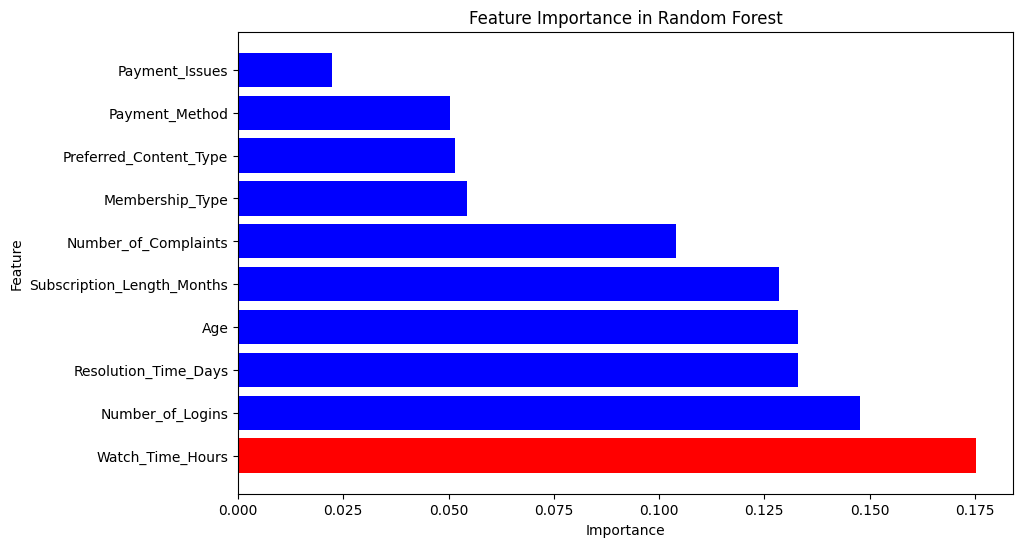

In [ ]:
# Extracting the feature importances from the best random forest model
feature_importance = best_rf.feature_importances_

# Getting the feature names from the DataFrame X
feature_names = X.columns

# Creating a DataFrame for better handling of feature importance data
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sorting the DataFrame by Importance in descending order for better visualization
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Printing the sorted DataFrame to display the features and their importance
print(importance_df)

colors = ['blue'] * len(importance_df)
colors[0] = 'red'
# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()